# **Car Data Analysis**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from itertools import permutations
from math import comb

In [2]:
# Load the dataset
df = pd.read_csv('/content/CarFeatures.csv')

In [3]:
# Q1. Perform EDA on the given dataset.
print("First few rows of the dataset:")
print(df.head())
print("\nData types of the columns:")
print(df.dtypes)
print("\nChecking for missing values:")
print(df.isnull().sum())


First few rows of the dataset:
         Make Fuel Type Aspiration Number of Doors   Body Style Drive Wheels  \
0      Toyota    Diesel        Std             Two  Convertible          Fwd   
1  Mitsubishi    Diesel        Std            Four  Convertible          Fwd   
2   Chevrolet       Gas      Turbo            Four    Hatchback          Rwd   
3  Mitsubishi       Gas      Turbo            Four    Hatchback          Fwd   
4    Mercedes       Gas        Std            Four        Sedan          Rwd   

  Engine Location Number of Cylinders  Wheel Base  Length  Width  Height  \
0           Front              Twelve        95.1   175.9   60.6    59.4   
1            Rear                Four        91.7   153.9   60.5    55.1   
2           Front                 Two       116.2   203.5   65.3    58.5   
3           Front               Three       112.8   154.3   64.9    51.4   
4            Rear                 Two       115.1   143.4   62.6    49.6   

   Curb Weight  Engine Size  Ho


Univariate Analysis:


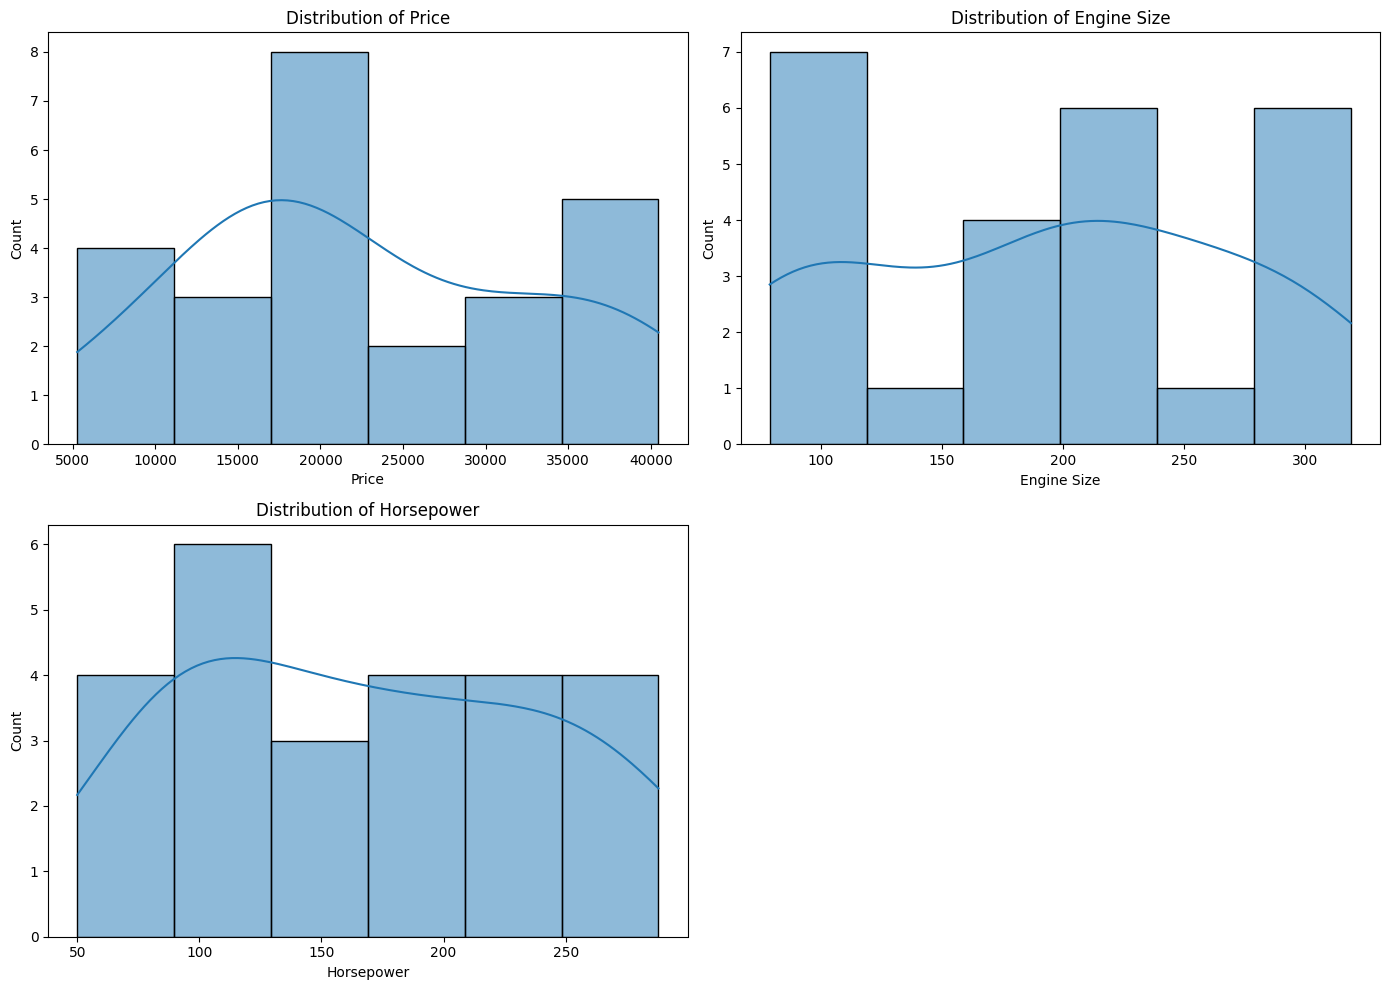

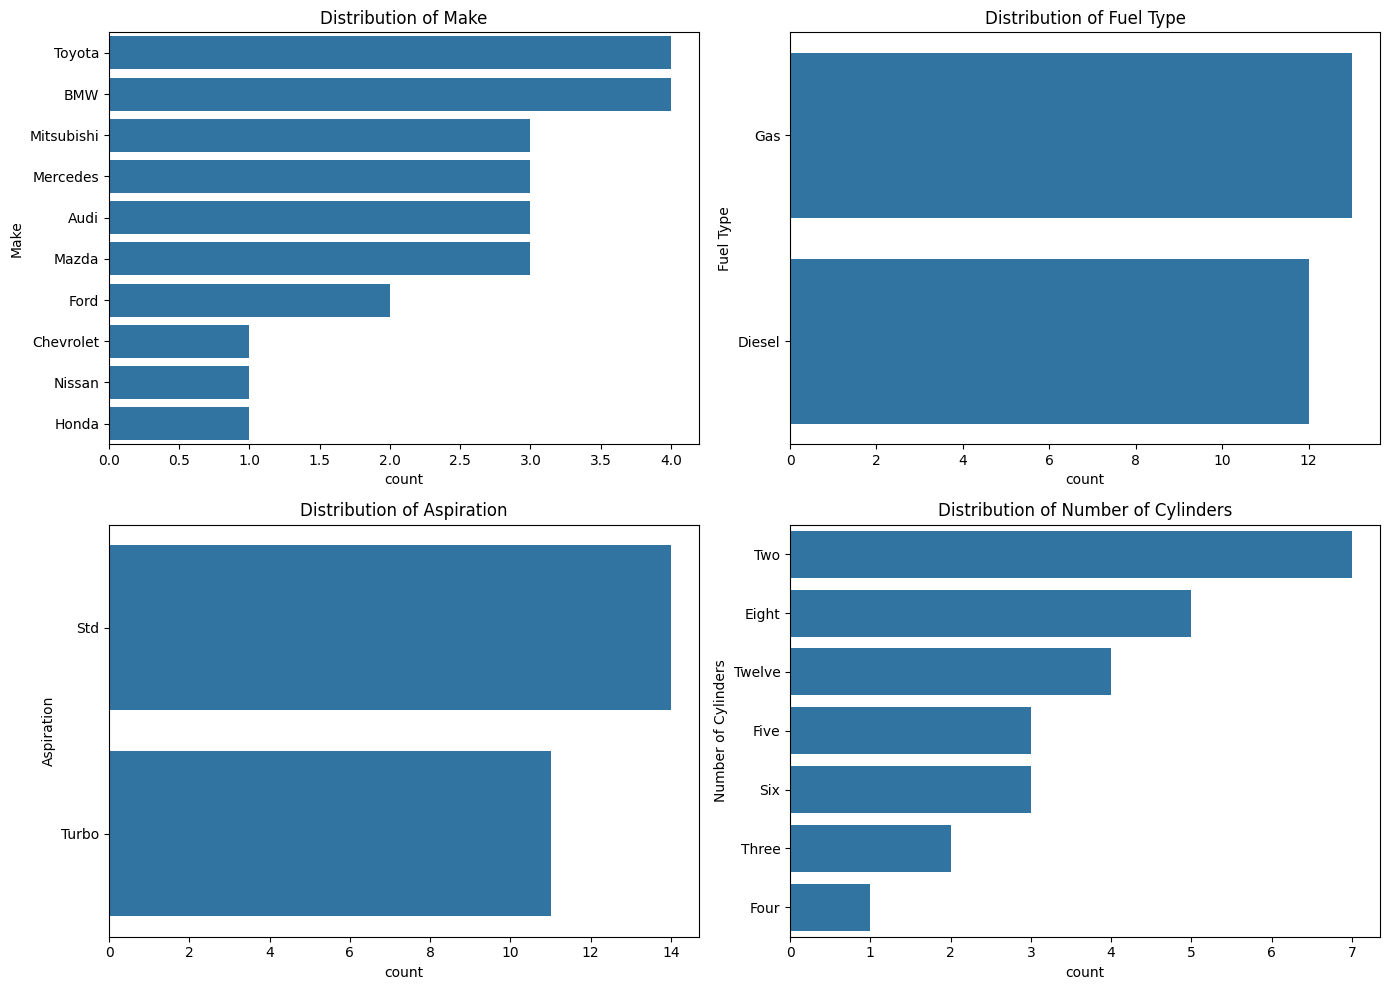

In [4]:
# Univariate Analysis
print("\nUnivariate Analysis:")

# Visualize the distribution of numerical features
numerical_features = ['Price', 'Engine Size', 'Horsepower']
plt.figure(figsize=(14, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Visualize the distribution of categorical features
categorical_features = ['Make', 'Fuel Type', 'Aspiration', 'Number of Cylinders']
plt.figure(figsize=(14, 10))
for i, feature in enumerate(categorical_features):
    plt.subplot(2, 2, i+1)
    sns.countplot(y=df[feature], order=df[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


Bivariate Analysis:


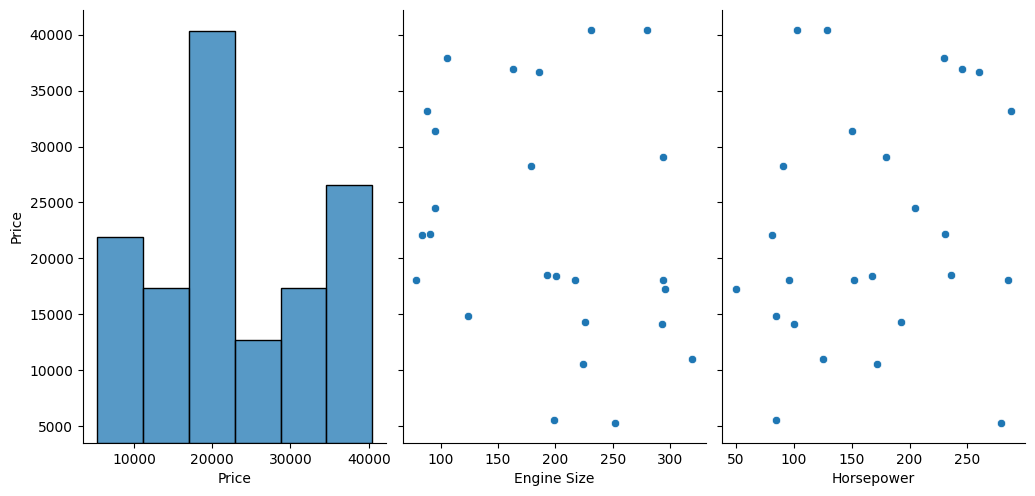

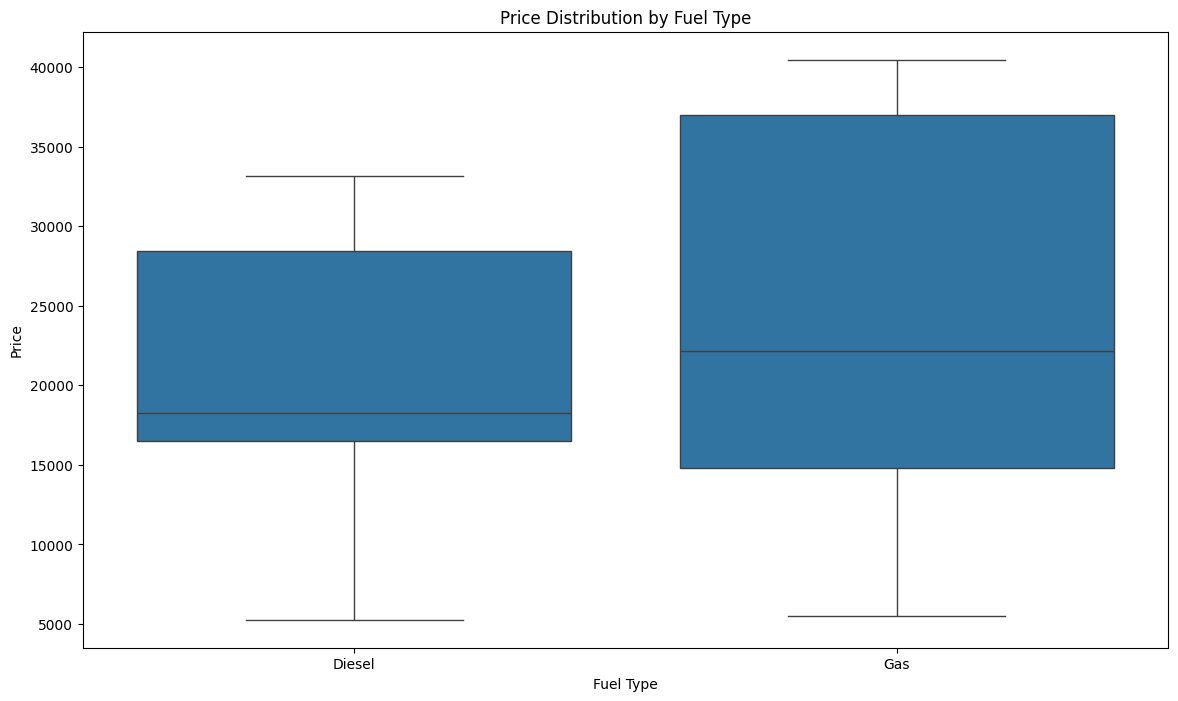

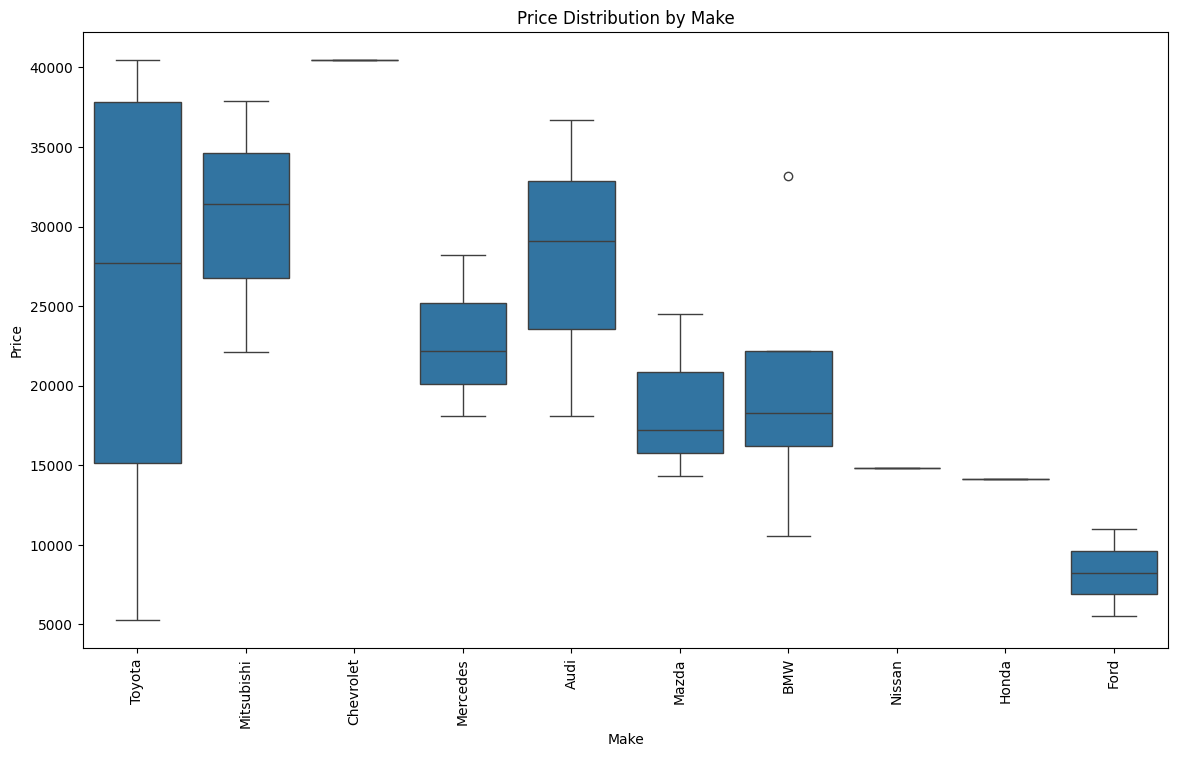

In [5]:
# Bivariate Analysis
print("\nBivariate Analysis:")

# Visualize the relationship between price and other numerical features
sns.pairplot(df, x_vars=numerical_features, y_vars='Price', height=5, aspect=0.7, kind='scatter')
plt.show()

# Visualize the relationship between categorical features and price
plt.figure(figsize=(14, 8))
sns.boxplot(x='Fuel Type', y='Price', data=df)
plt.title('Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(14, 8))
sns.boxplot(x='Make', y='Price', data=df)
plt.title('Price Distribution by Make')
plt.xlabel('Make')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

In [6]:
# Q2. Summarize the data using descriptive statistics.
print("\nDescriptive statistics of the dataset:")
print(df.describe(include='all'))


Descriptive statistics of the dataset:
       Wheel Base      Length      Width     Height  Curb Weight  Engine Size  \
count   25.000000   25.000000  25.000000  25.000000    25.000000    25.000000   
mean   105.736000  173.928000  65.868000  52.680000  2907.720000   192.360000   
std      9.046403   18.508523   3.632804   3.623534   777.650924    79.342548   
min     91.700000  143.400000  60.500000  47.800000  1488.000000    79.000000   
25%     96.000000  161.400000  62.500000  50.000000  2108.000000   106.000000   
50%    106.800000  172.400000  66.300000  51.800000  3231.000000   199.000000   
75%    113.900000  187.800000  68.500000  55.100000  3433.000000   252.000000   
max    119.600000  207.600000  71.500000  59.800000  3922.000000   319.000000   

       Horsepower   City MPG  Highway MPG         Price  
count   25.000000  25.000000    25.000000     25.000000  
mean   168.760000  29.720000    37.640000  22684.920000  
std     73.189981  10.659581    10.664896  10684.205266 

In [7]:
# Q3. Identify the costliest car and the cheapest car by average price.
print("\nCostliest and Cheapest Car by Average Price:")

# Group by 'make' and calculate average price
grouped_by_make = df.groupby('Make')['Price'].mean().sort_values(ascending=False)

costliest_make = grouped_by_make.idxmax()
cheapest_make = grouped_by_make.idxmin()

costliest_car = df[df['Make'] == costliest_make]
cheapest_car = df[df['Make'] == cheapest_make]

print(f"Costliest Car:\n{costliest_car}")
print(f"Cheapest Car:\n{cheapest_car}")


Costliest and Cheapest Car by Average Price:
Costliest Car:
        Make Fuel Type Aspiration Number of Doors Body Style Drive Wheels  \
2  Chevrolet       Gas      Turbo            Four  Hatchback          Rwd   

  Engine Location Number of Cylinders  Wheel Base  Length  Width  Height  \
2           Front                 Two       116.2   203.5   65.3    58.5   

   Curb Weight  Engine Size  Horsepower  City MPG  Highway MPG  Price  
2         3815          231         129        13           41  40450  
Cheapest Car:
    Make Fuel Type Aspiration Number of Doors Body Style Drive Wheels  \
23  Ford       Gas      Turbo            Four      Wagon          4wd   
24  Ford       Gas      Turbo             Two      Wagon          Fwd   

   Engine Location Number of Cylinders  Wheel Base  Length  Width  Height  \
23           Front                 Two       118.8   161.4   68.5    55.5   
24           Front                 Six       106.8   172.4   68.4    55.3   

    Curb Weight  Engi

In [9]:
# Q4. Which fuel type car has the highest average price?
avg_price_by_fuel = df.groupby('Fuel Type')['Price'].mean().sort_values(ascending=False)
print(f"\nFuel type with the highest average price: {avg_price_by_fuel}")



Fuel type with the highest average price: Fuel Type
Gas       24979.230769
Diesel    20199.416667
Name: Price, dtype: float64


In [10]:
# Q5. Construct the contingency table (take “make” as row variable)
print("\nContingency table (make as row variable):")

contingency_table = pd.crosstab(df['Make'], df['Fuel Type'])
print(contingency_table)


Contingency table (make as row variable):
Fuel Type   Diesel  Gas
Make                   
Audi             2    1
BMW              4    0
Chevrolet        0    1
Ford             0    2
Honda            0    1
Mazda            2    1
Mercedes         1    2
Mitsubishi       1    2
Nissan           0    1
Toyota           2    2


In [11]:
# Q6. What is the probability that a randomly selected car will be a BMW?
prob_bmw = df[df['Make'] == 'BMW'].shape[0] / df.shape[0]
print(f"\nProbability that a randomly selected car will be a BMW: {prob_bmw}")


Probability that a randomly selected car will be a BMW: 0.16


In [12]:
# Q7. What is the probability that a randomly selected car will be an Audi?
prob_audi = df[df['Make'] == 'Audi'].shape[0] / df.shape[0]
print(f"\nProbability that a randomly selected car will be an Audi: {prob_audi}")


Probability that a randomly selected car will be an Audi: 0.12


In [13]:
# Q8. Form the null and alternate hypothesis to test whether the price of Gas cars is significantly different from that of Diesel Cars

gas_prices = df[df['Fuel Type'] == 'gas']['Price']
diesel_prices = df[df['Fuel Type'] == 'diesel']['Price']

t_stat, p_val = stats.ttest_ind(gas_prices, diesel_prices)
print(f"\nT-statistic: {t_stat}, P-value: {p_val}")


T-statistic: nan, P-value: nan


In [14]:
# Q9. Conduct hypothesis test

alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: The price of gas cars is significantly different from that of diesel cars.")
else:
    print("Fail to reject the null hypothesis: The price of gas cars is not significantly different from that of diesel cars.")

Fail to reject the null hypothesis: The price of gas cars is not significantly different from that of diesel cars.


Null Hypothesis (H0): The average price of Gas cars is equal to the average price of Diesel cars.

Alternative Hypothesis (H1): The average price of Gas cars is significantly different from the average price of Diesel cars.

In [15]:
# Q10. Probability that a randomly selected car is a 'Luxury Car'

luxury_cars = ['BMW', 'Mercedes', 'Audi']
prob_luxury = df[df['Make'].isin(luxury_cars)].shape[0] / df.shape[0]

print(f"\nProbability that a randomly selected car is a 'Luxury Car': {prob_luxury}")


Probability that a randomly selected car is a 'Luxury Car': 0.4


In [16]:
# Q11. Number of ways to arrange three unique cars for a race based on 'Make'

unique_makes = df['Make'].unique()
arrangements = len(list(permutations(unique_makes, 3)))

print(f"\nNumber of ways to arrange three unique cars for a race: {arrangements}")


Number of ways to arrange three unique cars for a race: 720


In [21]:
#  Q12. If you randomly pick a car with 8 cylinders, what is the probability that BMW?

cars_8_cyl = df[df['Number of Cylinders'] == 8]
num_cars_8_cyl = cars_8_cyl.shape[0]

if num_cars_8_cyl > 0:
    prob_bmw_8_cyl = cars_8_cyl[cars_8_cyl['Make'] == 'BMW'].shape[0] / num_cars_8_cyl
    print(f"\nProbability that a randomly picked car with 8 cylinders is a BMW: {prob_bmw_8_cyl}")
else:
    print("\nThere are no cars with 8 cylinders in the dataset.")



There are no cars with 8 cylinders in the dataset.


In [24]:
# Q13. Probability that exactly 3 out of 7 selected cars have 'Turbo' aspiration

from math import comb

# Total number of cars
total_cars = len(df)
# Total number of Turbo cars
total_turbo_cars = len(df[df['Aspiration'] == 'Turbo'])

# Probability of a car being Turbo
p_turbo = total_turbo_cars / total_cars

# Number of cars selected
n = 7
# Number of Turbo cars desired in the selection
k = 3

# Calculate the binomial probability
prob_exactly_three_turbo = comb(n, k) * (p_turbo ** k) * ((1 - p_turbo) ** (n - k))

print(f"Probability of selecting exactly 3 out of 7 cars with 'Turbo' aspiration: {prob_exactly_three_turbo}")

Probability of selecting exactly 3 out of 7 cars with 'Turbo' aspiration: 0.29320959754240006


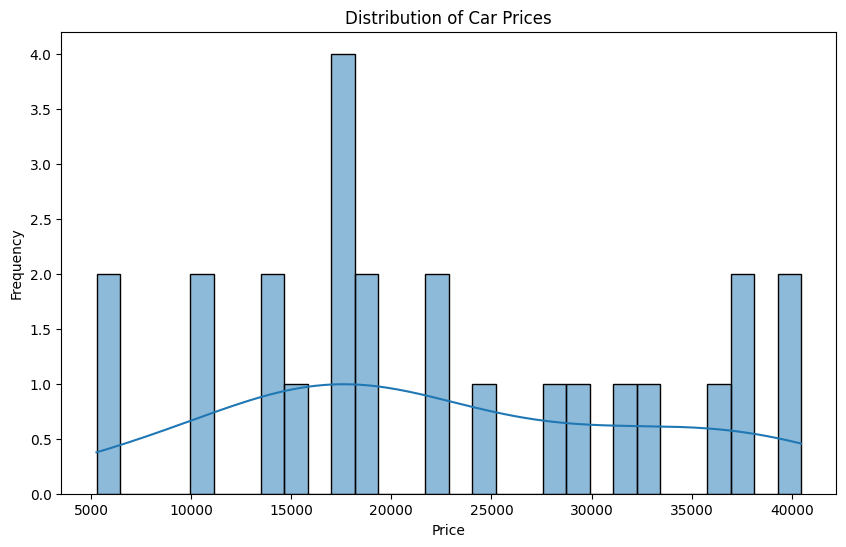

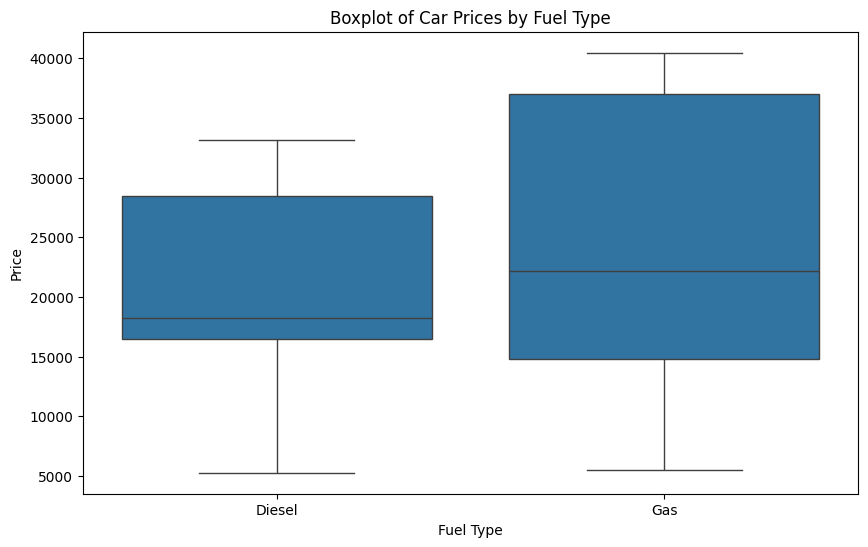

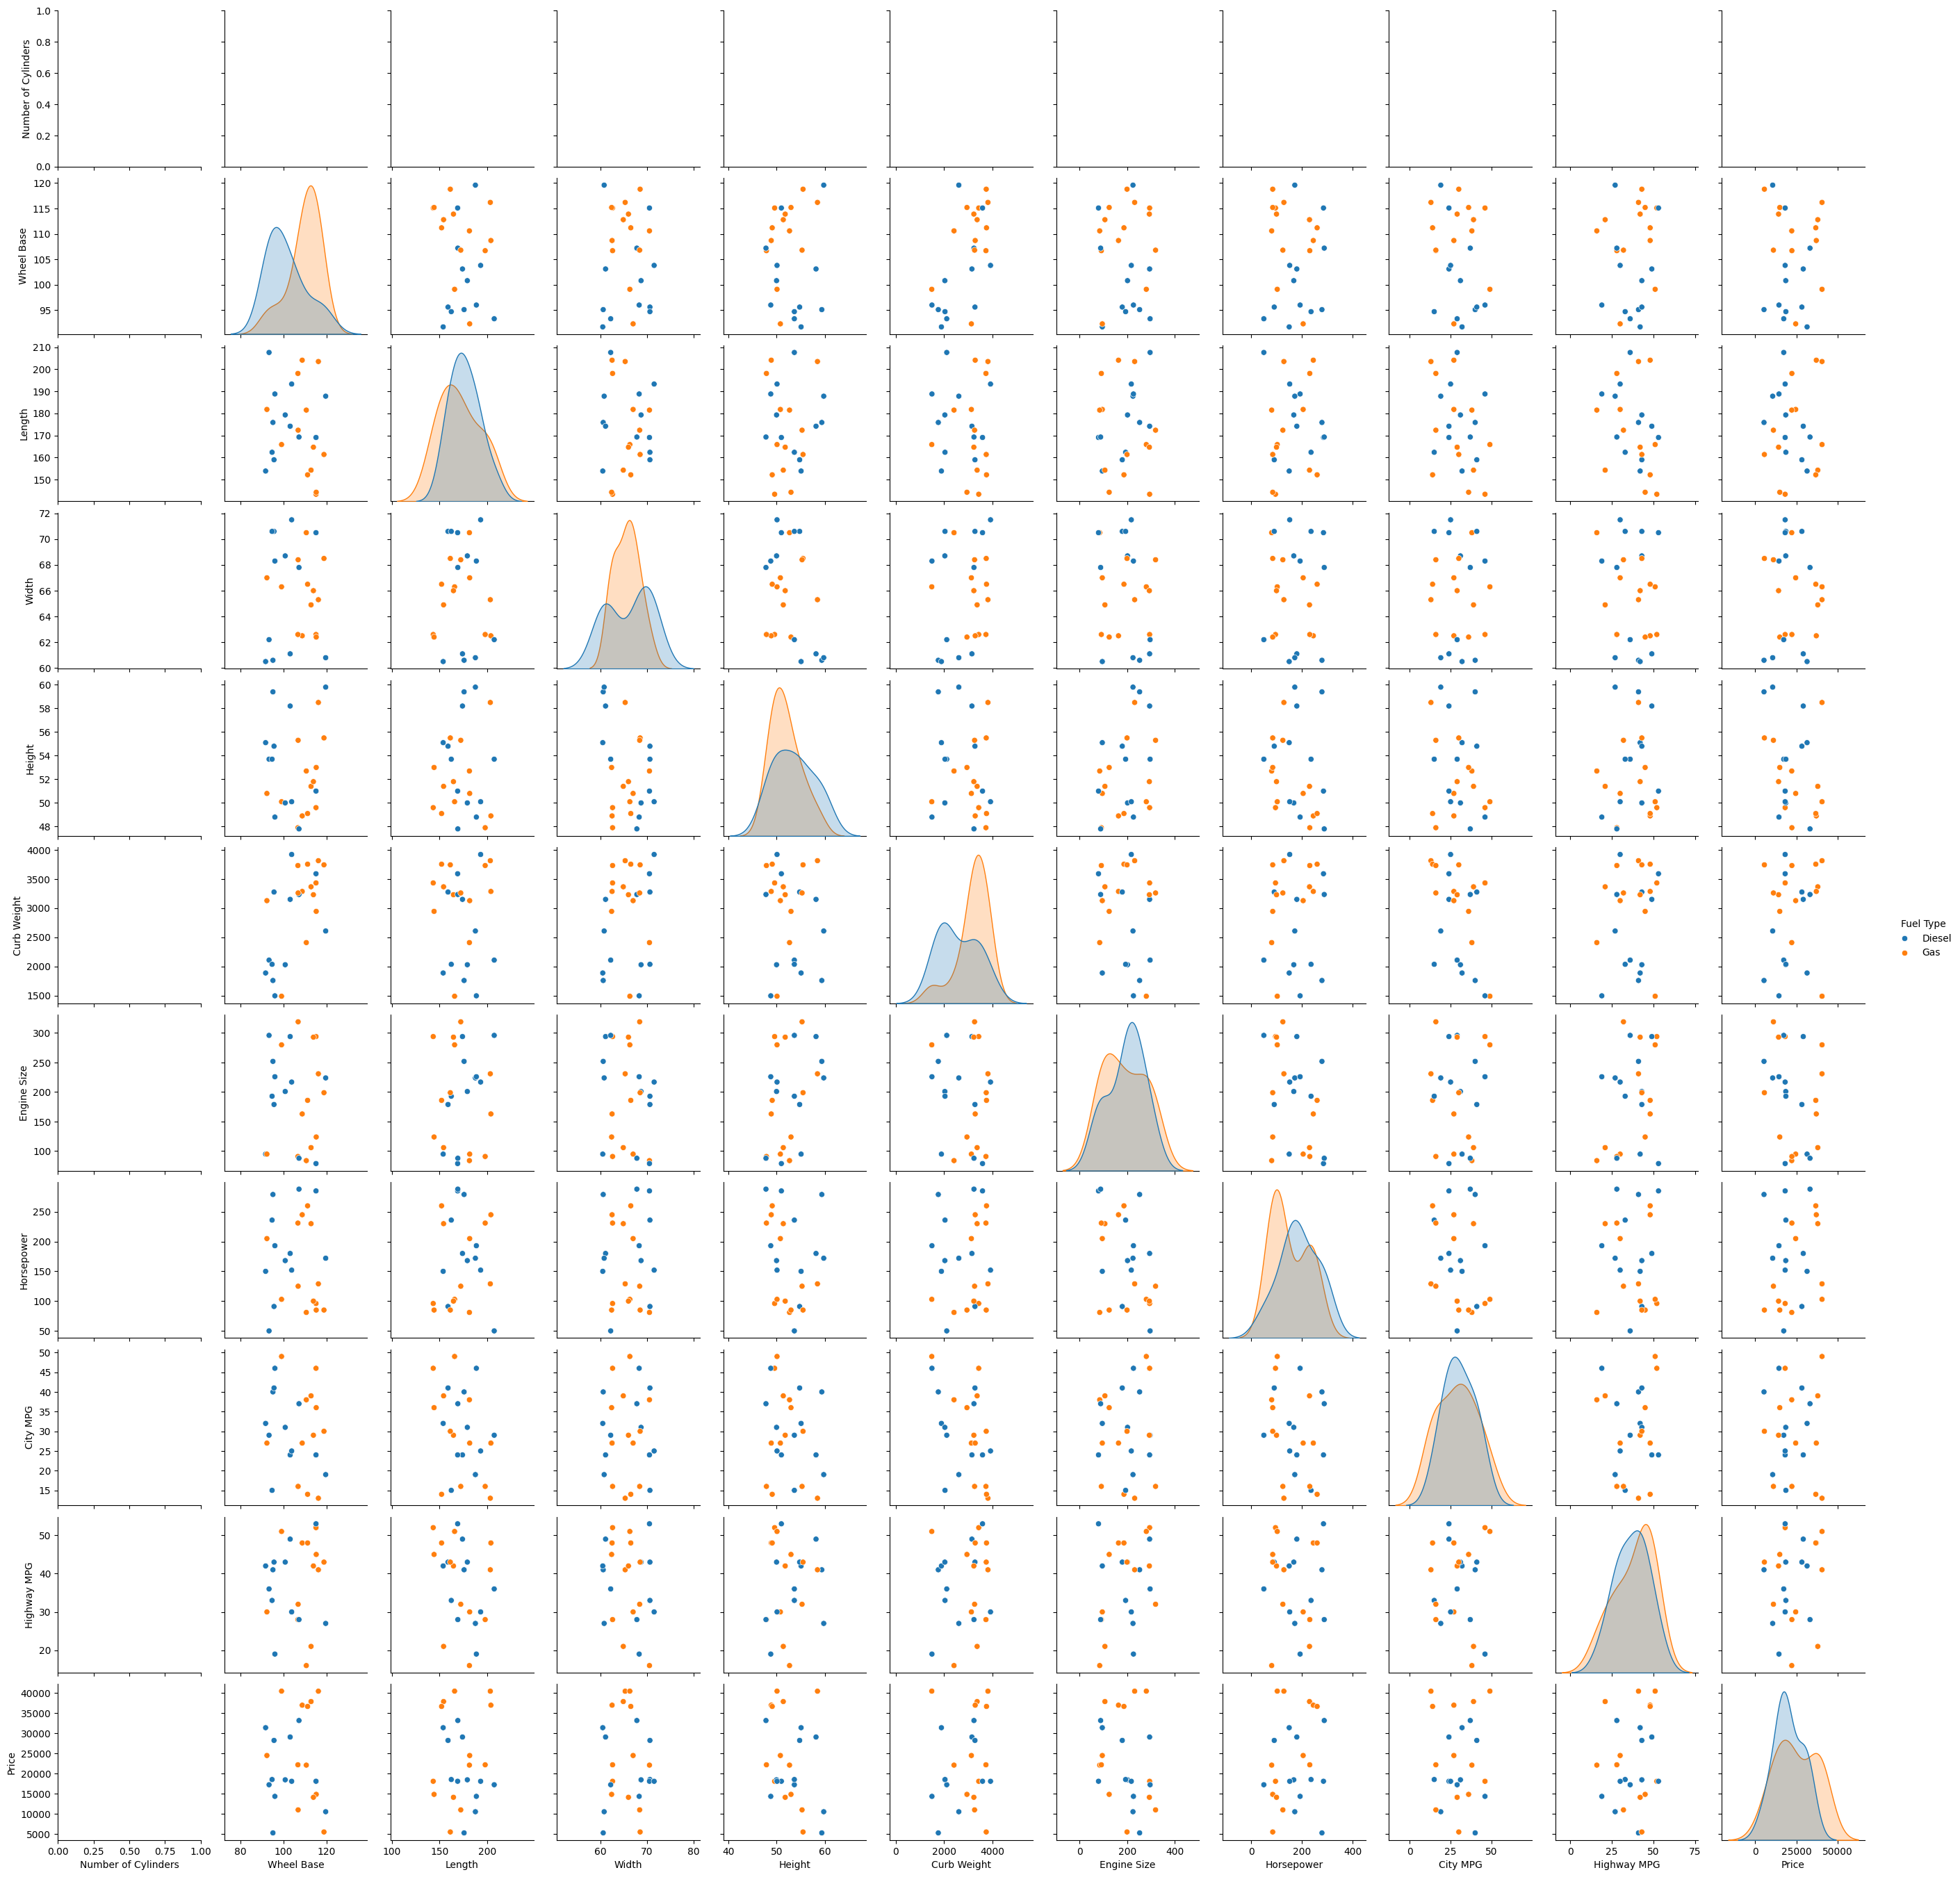

In [25]:
# Visualizations (optional)
# Distribution of 'price'
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Boxplot of 'price' by 'fuel-type'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel Type', y='Price', data=df)
plt.title('Boxplot of Car Prices by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()

# Pairplot
sns.pairplot(df, hue='Fuel Type')
plt.show()